<a href="https://colab.research.google.com/github/poncho-ajmv/Proyecto6toSemestre/blob/main/99.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clasificación de Teléfonos por Rango de Precio

## Introducción
Este proyecto tiene como objetivo clasificar los teléfonos de la compañía en rangos de precios (Baja, Media, Alta, Alta Gama) utilizando un modelo de Machine Learning. Para ello, seguiremos los siguientes pasos:

1. Carga y exploración de datos.
2. Preprocesamiento de datos.
3. Entrenamiento del modelo.
4. Evaluación del modelo.
5. Matriz de confusión.


In [34]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Cargar los datasets
dataset_telefonos = pd.read_csv('dataset_telefonos.csv')
dataset_compania = pd.read_csv('dataset_telefonos_compania.csv')




In [25]:
# Verificar valores nulos
print("Valores nulos en dataset_telefonos:")
print(dataset_telefonos.isnull().sum())

print("\nValores nulos en dataset_compania:")
print(dataset_compania.isnull().sum())

# Estadísticas descriptivas
print("\nEstadísticas descriptivas de dataset_telefonos:")
print(dataset_telefonos.describe())

print("\nEstadísticas descriptivas de dataset_compania:")
print(dataset_compania.describe())

Valores nulos en dataset_telefonos:
screen_height      0
screen_width       0
weight_meassure    0
clock_speed        0
cores              0
memory_capacity    0
ram_capacity       0
dual_sim           0
bluetooth          0
wifi               0
price_range        0
dtype: int64

Valores nulos en dataset_compania:
screen_height      0
screen_width       0
weight_meassure    0
clock_speed        0
cores              0
memory_capacity    0
ram_capacity       0
dual_sim           0
bluetooth          0
wifi               0
price_range        0
dtype: int64

Estadísticas descriptivas de dataset_telefonos:
       screen_height  screen_width  weight_meassure  clock_speed  \
count    1950.000000   1950.000000      1950.000000  1950.000000   
mean       12.319487      5.782564       140.209744     1.522667   
std         4.216070      4.349520        35.372294     0.813918   
min         5.000000      0.000000        80.000000     0.500000   
25%         9.000000      2.000000       109.000000

In [26]:
# Codificar variables categóricas (incluyendo 'cores')
label_encoder = LabelEncoder()
categorical_cols = ['dual_sim', 'bluetooth', 'wifi', 'cores']

for col in categorical_cols:
    # Ajustar y transformar en el dataset principal
    dataset_telefonos[col] = label_encoder.fit_transform(dataset_telefonos[col].astype(str))
    # Transformar en el dataset de la compañía (usar el mismo encoder)
    dataset_compania[col] = label_encoder.transform(dataset_compania[col].astype(str))

# Separar características (X) y variable objetivo (y)
X = dataset_telefonos.drop('price_range', axis=1)
y = dataset_telefonos['price_range']

X_compania = dataset_compania.drop('price_range', axis=1)
y_compania = dataset_compania['price_range']

In [27]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

print("¡Modelo entrenado!")

¡Modelo entrenado!


In [28]:
print(dataset_telefonos['cores'].unique())  # Ejemplo: ['Quad-Core', 'Hepta-Core', ...]

[0 5 3 1 7 2 4 6]


In [33]:


# Predecir en el dataset de la compañía
y_pred = model.predict(X_compania)

# Calcular la precisión (accuracy)
accuracy = accuracy_score(y_compania, y_pred)
print(accuracy)
print(f"Precisión del modelo: {accuracy * 100:.2f}%")

0.74
Precisión del modelo: 74.00%


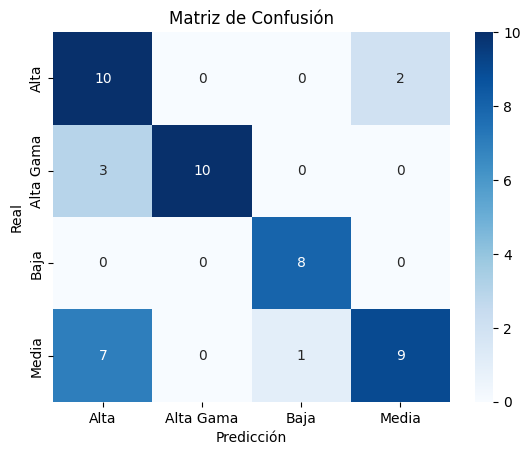

In [30]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Crear la matriz de confusión
conf_matrix = confusion_matrix(y_compania, y_pred)

# Visualizar la matriz de confusión
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()